# Problem set 3 (43 + 35 = 78 pts)

# Making GANs great (43 pts)

GAN is typical example of high quality generative model. But we are still able to improve it. $G$ is model which maps latent distribution $p_z$ to the output $p_g$. Learning such $G$ that $p_g$ match original data distribution $p_d$ is quite complex task. In general $p_z$ is modeled by normal distribution. The reason for that is simplicity of sampling. But doing this we apply strong limitations on our model. It results in huge number of bad samples (non realistic images). To fix this problem we will correct latent distribution - decrease probability for "bad" samples and increase for "good" ones. Defining the criteria of "good" is not simple in general. So to find solution let's consider derivation for optimal discriminator:

$$D^*(x) = \frac{p_d(x)}{p_d(x) + p_g(x)}$$

Defining $d(x) = \mathrm{logit}(D(x))$ we can rewrite previous expression:

$$p_d(x) = p_g(x)\exp(d(x))$$

Since $p_g(x)$ induced by $p_z$ and $G$:

$$p^*(z) = p_z(z)\exp(d(G(z)))$$

We found the corrected distribution. Similar steps can be applied to non-standard GANs such as Wasserstein GAN (WGAN).

In this task you will be asked to improve the quality by correction of latent distribution for WGAN. An obvious question to ask is: "Why do we take WGAN?". You will answer it by yourself!

## Theoretical part (10 pts)

Suppose we have two 2D distributions: $P_\theta(x,\theta)$ and $P_*(x,\theta^*)$, where $\theta$ some parameter, $\theta^*$ is known fixed value, $x$ is random variable which has uniform distribution $x \sim U(0,1)$. In other words we have two horisontal lines in 2D space with certain $y$ position and $x$ uniformly distributed on the segment [0,1]. Find analytically distance between this distributions in different metrics for all possible values of $\theta$: 

1) KL divergence (2 pts)

From KL divergence formula:

$$KL(P_{\theta} || P_{*}) = \int\limits_{x \sim U(0, 1), y=\theta} f_{\theta}(x, \theta) \log(\frac{f_{\theta}(x, \theta)}{f_{*}(x, \theta)}) dx$$
where $f_{\theta}$ and $f_{*}$ are probabilty density functions of $P_\theta(x,\theta)$ and $P_*(x,\theta^*)$ accordingly. 
$$ f_{\theta}(x, y) = \begin{cases} 1 & \text { if } y=\theta \text { and } x \in [0,1] \\ 0 & \text { otherwise } \end{cases}$$
$$ f_{*}(x, y) = \begin{cases} 1 & \text { if } y=\theta^* \text { and } x \in [0,1] \\ 0 & \text { otherwise } \end{cases}$$
Therefore we have:
$$KL(P_{\theta} || P_{*}) = \int\limits_{x \sim U(0, 1), y=\theta} 1\log{\frac{1}{0}} dx= +\infty$$

If $\theta = \theta^*$, then $f_\theta(x, \theta) = f_*(x, \theta) = 1$, and $\log(\frac{f_{\theta}(x, \theta)}{f_{*}(x, \theta)}) = \log(\frac{1}{1}) = 0$, thus $KL(P_{\theta} || P_{*}) = 0$.

Similarly we can show it for $KL(P_{*} || P_{\theta})$. Final result:
$$KL(P_{\theta} || P_{*}) = KL(P_{*} || P_{\theta}) = \begin{cases}+\infty & \text { if } \theta \neq \theta^*, \\ 0 & \text { if } \theta=\theta^*\end{cases}$$

2) JS divergence (3 pts)

Formula for our case is:
$$JS(P_{\theta} || P_{*}) = \frac{1}{2}KL(P_{\theta} || \frac{1}{2}(P_{\theta} + P_{*})) + \frac{1}{2}KL(P_{*} || \frac{1}{2}(P_{\theta} + P_{*}))$$
If $\theta \neq \theta^*$:
$$KL(P_{\theta} || \frac{1}{2}(P_{\theta} + P_{*})) = \int\limits_{x \sim U(0, 1), y=\theta} f_{\theta}(x, \theta) \log(\frac{f_{\theta}(x, \theta)}{\frac{1}{2}(f_{\theta}(x, \theta) + f_{*}(x, \theta))})dx = \int\limits_{x \sim U(0, 1), y=\theta} 1 \log(\frac{1}{\frac{1}{2}(1+0)})dx = \log2$$
Analogously, we have:
$$KL(P_{*} || \frac{1}{2}(P_{\theta} + P_{*})) = \int\limits_{x \sim U(0, 1), y=\theta^*} 1 \log(\frac{1}{\frac{1}{2}(0+1)})dx = \log2$$
So finally, JSD is:
$$JS(P_{\theta} || P_{*}) = \frac{1}{2}\log2 + \frac{1}{2}\log2 = \log2$$
In case of $\theta = \theta^*$: $P_\theta = P_*$ and $\frac{1}{2}(P_\theta + P_*) = P_*$. Thus, KL divergences will be zero:
$$KL(P_{*} || \frac{1}{2}(P_{\theta} + P_{*})) = KL(P_{*}||P_{*}) = \int\limits_{x \sim U(0, 1), y=\theta^*} 1 log(\frac{1}{1})dx = 0$$
From above results:
$$JS(P_{\theta} || P_{*}) = \begin{cases}\log 2 & \text { if } \theta \neq \theta^* \\ 0 & \text { if } \theta=\theta^*\end{cases}$$

3) Wasserstein distance (3 pts)
$$W(P_\theta, P_*)=\inf _{\gamma \in \Pi(P_\theta, P_*)} \mathbb{E}_{(a, b) \sim \gamma}[\|a-b\|]$$
Here $a$ and $b$ two dimensional vectors, which have $x$ and $y$ coordinates.
$$W(P_\theta, P_*) = \inf _{\gamma \in \Pi(P_\theta, P_*)} \int \|a-b\|d\gamma = \inf _{\gamma \in \Pi(P_\theta, P_*)} \int \sqrt[p]{|x_1 - x_2|^p + |\theta - \theta^*|^p}d\gamma \geq \inf _{\gamma \in \Pi(P_\theta, P_*)} \int |\theta - \theta^*|d\gamma = |\theta - \theta^*| \inf _{\gamma \in \Pi(P_\theta, P_*)} \int d\gamma = |\theta - \theta^*|$$
Here integral by gamma is equal to one, because gamma is joint distribution. To achive this lower bound, we can take such joint distribution $\gamma$, in which all point pairs have same x coordinate.

Suppose we would like to optimize parameter $\theta$ in order to fit target distribution $P_*$ with our parametrised distribution $P_\theta$. Which distance will you choose for this task? Why? (2 pts)

**Answer**

For this task I will choose Wasserstein distance, and reason is that for KL and JS divergences wrong paramters $\theta$ are equally bad, in other words, if we have true parameter $\theta^*$ and two estaimates of it $\theta_1$ and $\theta_2$, KL and JS will show equal distance between them: $KL(P_{*} || P_{\theta_1}) = KL(P_{*} || P_{\theta_2}) = +\infty$, $JS(P_{\theta_1} || P_{*}) = JS(P_{\theta_@} || P_{*}) = \log2$, even if $\theta_1$ much closer to $\theta^*$, than $\theta_2$. Therefore, Wasserstein distance better indicates, how far we are from true distribution.

## Practical part

Here you will implement WGAN-GP and train it!

In [ ]:
!pip install -q git+https://github.com/kwotsin/mimicry.git torchmetrics torch-fidelity gdown

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.4.0 requires cupy-cuda11x<12.0.0a0,>=9.5.0, which is not installed.
onnx 1.13.1 requires protobuf<4,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
kfp 1.8.20 requires google-api-python-client<2,>=1.7.8, but you have google-api-python-client 2.86.0 which is incompatible.
kfp 1.8.20 requires PyYAML<6,>=5.3, but you have pyyaml 6.0 which is incompatible.
gcsfs 2023.3.0 requires fsspec==2023.3.0, but you have fsspec 2023.4.0 which is incompatible.
cudf 23.4.0 requires protobuf<4.22,>=4.21.6, but you have protobuf 3.19.6 which is incompatible.
beatrix-jupyterlab 2023.46.184821 requires jupyter-server~=1.16, but you have jupyter-server 2.5.0 which is incompatible.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10

In [ ]:
import torch
import torch_mimicry as tmim
import torchvision as tv
import gdown
import os
from PIL import Image
from tqdm import tqdm
import gc
import matplotlib.pyplot as plt
import numpy as np
from torchmetrics.image.fid import FrechetInceptionDistance as FID
from torchvision.utils import make_grid

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


For simplicity we will take architectures for generator and discriminator from open source library torch-mimicry (you are free to change output size of model)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

G = tmim.nets.wgan_gp.wgan_gp_128.WGANGPGenerator128().to(device)
D = tmim.nets.wgan_gp.wgan_gp_128.WGANGPDiscriminator128().to(device)

## Your work starts here

### The first task is to implement loss functions for WGAN-GP (8 pts)

1) Implement loss function for discriminator (1 pts)

2) Implement loss function for generator (1 pts)

3) Implement gradient penalty for discriminator optimization (6 pts)

In [ ]:
def loss_D(d_fake,d_real):
    # define the loss of discriminator based on d_fake = D(G(z)) and d_real = D(x)
    loss = torch.mean(d_fake) - torch.mean(d_real)
    return loss

In [ ]:
def loss_G(d_fake):
    # define the loss of generator based on output_fake = D(G(z))
    loss = -torch.mean(d_fake)
    return loss

The most important moment in training WGAN-GP is gradient penalty. It is added to discriminator loss to ensure stability. Your goal is to implement following steps:

1) For given $N$ real images $x_{\mathrm{real}}$ and $N$ fake images $x_{\mathrm{fake}}$ compute random interpolation between real and fake samples in following way:

(use .detach() function over $x_{\mathrm{fake}}$ in order to get tensor without gradient graph)

$$x_{\mathrm{interpolation}} = \alpha x_{\mathrm{real}} + (1-\alpha)x_{\mathrm{fake}}$$

where $\alpha \sim U(0,1)$ (sampled from uniform distribution), $x_{\mathrm{real}}$ is of size $[N,3,H,W]$, $x_{\mathrm{fake}}$ is of size $[N,3,H,W]$ and $\alpha$ is of size $[N]$

2) Compute gradient of discriminator output with respect to input (interpolated samples)

$$\nabla D(x_{\mathrm{interpolation}})$$

It will be of size $[N,3,H,W]$, for ease of use reshape it to $[N,3HW]$

3) Compute loss:

$$\mathcal{L} = \mathrm{E}(\|\nabla D(x_{\mathrm{interpolation}})\|_2 - 1)^2$$

Second norm $\|\cdot\|_2$ is taken over second dimension (after reshaping in previous step), mean $\mathrm{E}$ is taken over first dimension. 

In [ ]:
def loss_GP(x_fake,x_real,D):
    # compute gradient penalty
    N = x_fake.size(0)
    alpha = torch.rand(N, 1, 1, 1, device=device)
    x_interpolation = alpha * x_real + (1 - alpha) * x_fake.detach()
    x_interpolation.requires_grad = True
    D_output = D(x_interpolation)
    grad = torch.autograd.grad(
        outputs=D_output,
        inputs=x_interpolation,
        grad_outputs=torch.ones(D_output.size(), device=device),
        create_graph=True,
        retain_graph=True,
        only_inputs=True,
    )[0]
    loss = torch.mean((torch.norm(grad, dim=1) - 1)**2)
    return loss

### The second task is to implement standard stuff: (6 pts)

1) Download Celeba dataset, apply appropriate data transformation, create dataloader (3 pts)

You can use batch size equal 64. Do not forget to use materials shared on seminars!

2) Initialize optimizers for discriminator and generator (3 pts)

You can take Adam optimizer with **lr** $= 2\cdot 10^{-4}$, $\beta_1$ = 0 and $\beta_2$ = 0.9

In [ ]:
!gdown -q 1Xqf-whUB2owjf5gcB6k9-ifzoc62tEQo
!unzip -q img_align_celeba.zip

In [ ]:
class CelebADataset():
    def __init__(self, img_path, transform):
        self.img_path = img_path
        self.transform = transform
        self.dataset = []
        self.preprocess()
        self.num_images = len(self.dataset)

    def preprocess(self):
        for i in range(len([name for name in os.listdir(self.img_path) if os.path.isfile(os.path.join(self.img_path, name))])):
            img_path = os.path.join(self.img_path, str(i+1).rjust(6, '0') +'.jpg')
            self.dataset.append(img_path)
            
        print('Finished preprocessing the CelebA dataset...')

    def __getitem__(self, index):
        img_path = self.dataset[index]
        image = Image.open(img_path)
        image = self.transform(image)
        return image

    def __len__(self):
        return self.num_images

In [ ]:
batch_size = 64
imsize = 128
transform = tv.transforms.Compose([tv.transforms.CenterCrop(178),
                                   tv.transforms.Resize((imsize, imsize)),
                                   tv.transforms.ToTensor(),
                                   tv.transforms.Normalize(0.5, 0.5)])


dataset = CelebADataset('img_align_celeba', transform)
dataloader = torch.utils.data.DataLoader(dataset=dataset, 
                                         batch_size=batch_size, 
                                         shuffle=True, 
                                         num_workers=2,
                                         drop_last=False)

Finished preprocessing the CelebA dataset...


In [ ]:
lr = 2e-4
betas = (0, 0.9)
optimizer_G = torch.optim.Adam(G.parameters(), lr=lr, betas=betas)
optimizer_D = torch.optim.Adam(D.parameters(), lr=lr, betas=betas)

### The third task is to implement (6 pts)

1) For number of discriminator training iterations **n_dis** optimize total discriminator loss (standard loss + gradient penalty)

$$\mathcal{L}_D = \mathrm{loss}_\mathrm{D}(d_\mathrm{fake},d_\mathrm{real}) + \mathrm{gp}_\mathrm{scale}\mathrm{loss}_{\mathrm{GP}}(x_\mathrm{fake}, x_\mathrm{real},D)$$

You can take $\mathrm{gp}_\mathrm{scale} = 10$, **n_dis** = 2. Use previously implemented functions

2) Optimize generator loss

Use previously implemented functions

3) Repeat steps 1) and 2) for large number of iterations (for example 100k, but you can stop earlier if good result found)

**Upload the weights of trained model to cloud storage (e.g. Google Drive) and add sharing link here**
https://drive.google.com/file/d/1dSLSdgXxroDjPJVbZl3ofLJmpJj3fhVe/view?usp=share_link

In [ ]:
def requires_grad(model, flag):
    for param in model.parameters():
        param.requires_grad = flag

In [ ]:
def train(G, D, dataloader, n_dis=2, gp_scale=10, n_iters=int(1e5)):
    # your code is here
    pbar = tqdm(range(n_iters))
    G.train()
    D.train()
    history_loss_D = []
    history_loss_G = []
    for step in pbar:
        requires_grad(G, False)
        requires_grad(D, True)
        for d_step, real in enumerate(dataloader):
            z = torch.randn(batch_size, 128, device=device)
            fake = G(z)
            d_fake = D(fake).ravel()
            real = real.to(device)
            d_real = D(real).ravel()
            loss_d = loss_D(d_fake, d_real)
            loss_gp = loss_GP(fake, real, D)
            loss_d = loss_d + gp_scale * loss_gp

            history_loss_D.append(loss_d.item())
            optimizer_D.zero_grad()
            loss_d.backward()
            optimizer_D.step()
                
            if (d_step + 1) >= n_dis:
                break
        
        requires_grad(G, True)
        requires_grad(D, False)
        z = torch.randn(batch_size, 128, device=device)
        fake = G(z)
        d_fake = D(fake)
        loss_g = loss_G(d_fake)

        history_loss_G.append(loss_g.item())
        optimizer_G.zero_grad()
        loss_g.backward()
        optimizer_G.step()

        pbar.set_description(f"Loss D {history_loss_D[-1]} Loss G {history_loss_G[-1]}")

    return history_loss_D, history_loss_G

In [ ]:
loss_d, loss_g = train(G, D, dataloader, n_iters=10000)
gc.collect()
torch.cuda.empty_cache()

Loss D -408.47235107421875 Loss G -3076.939453125: 100%|██████████| 1000/1000 [55:53<00:00,  3.35s/it]   


In [ ]:
torch.save({'iters': 10000,
            'g_state_dict': G.state_dict(),
            'd_state_dict': D.state_dict(),
            'optimizer_g_state_dict': optimizer_G.state_dict(),
            'optimizer_d_state_dict': optimizer_D.state_dict(),
            }, 'gan128_2.pt')

In [ ]:
!gdown -q 1dSLSdgXxroDjPJVbZl3ofLJmpJj3fhVe

checkpoint = torch.load('gan128_2.pt')
G.load_state_dict(checkpoint['g_state_dict'])
D.load_state_dict(checkpoint['d_state_dict'])
optimizer_G.load_state_dict(checkpoint['optimizer_g_state_dict'])
optimizer_D.load_state_dict(checkpoint['optimizer_d_state_dict'])

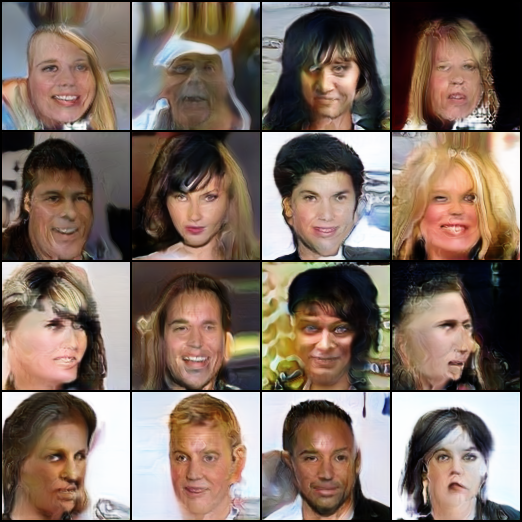

In [ ]:
G.eval()

with torch.no_grad():
    imgs = G(torch.randn(16, 128, device=device)).detach().cpu()

tv.transforms.ToPILImage()(make_grid(imgs, normalize=True, nrow=4))

### The fourth task is to check model performance (3 pts)

1) Evaluate the FID metric for your model (3 pts)

Do not forget to use materials shared on seminars!

In [ ]:
!gdown -q 1M25a7u7r9ON2J0Ktrx19JmV2hhtX3T2Z # for downloading finished fid

In [ ]:
fid = FID(normalize=True).to(device)

Downloading: "https://github.com/toshas/torch-fidelity/releases/download/v0.2.0/weights-inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/weights-inception-2015-12-05-6726825d.pth
100%|██████████| 91.2M/91.2M [00:00<00:00, 273MB/s]


In [ ]:
for data in tqdm(dataloader):
    fid.update(data.to(device) / 2 + 0.5, real=True)

torch.save(fid, 'fid.pt')

100%|██████████| 3166/3166 [07:08<00:00,  7.38it/s]


In [ ]:
G.eval()

N = 20000
with torch.no_grad():
    for i in tqdm(range(N // batch_size)):
        fid.update(G(torch.randn(batch_size, 128 , device=device)) / 2 + 0.5, real=False)

100%|██████████| 312/312 [02:08<00:00,  2.42it/s]


In [ ]:
gc.collect()
torch.cuda.empty_cache()
fid.compute()

tensor(38.2988, device='cuda:0')

### The last task is to improve performance by correcting latent code sampling procedure (10 pts)

In this part you will implement I-SIR method to sample latent codes from corrected latent distribution and evaluate model performance with updated sampling using FID metric.

#### I-SIR (7 pts)

Algorithm:

* Sample $z \sim N(0,1)$ of shape $[N_s,1,n_z]$, where $n_z$ - size of latent space (128 for our model)

* FOR number of iterations $N_i$:
    * Sample additional particles $z_{\mathrm{add}} \sim N(0,1)$ of shape $[N_s,N_p,n_z]$
    * Concatenate $z$ with $z_{\mathrm{add}}$ along second dimension and reshape to the form $[-1,n_z]$. The result will be new $z$ of size $[N_s(N_p+1),n_z]$
    * Compute logarithm of density for new $z$ 
    
    $\log\rho(z) = -\frac{||z||_2^2}{2} + D(G(z))$ 
    
    and reshape result to the size $[N_s,N_p+1]$.
    * Make element-wise sampling from log density: fix first index and sample second one with respect to corresponding log density value (consider torch.distributions.Categorical). The result will be $idxs$ of size $[N_s]$.
    * Take particles according to sampled indexs $z = z[torch.arange(N_s),idxs]$.
* Return new samples $z$

#### Evaluate model using new sampling procedure (3 pts)

Compute FID metric by sampling latent code using I-SIR function. Leave a comment on obtained results.

In [ ]:
def I_SIR(N_i, N_s, N_p, n_z, D, G):
    # your code is here
    z = torch.randn(N_s, n_z, device=device)
    for _ in range(N_i):
        z = z.unsqueeze(1)
        z_add = torch.randn(N_s, N_p, n_z, device=device)
        z = torch.cat([z, z_add], dim=1).reshape(-1, n_z)
        log_density = -torch.norm(z, dim=1)**2 / 2 + D(G(z)).ravel()
        log_density = log_density.reshape(N_s, -1)
        sampler = torch.distributions.categorical.Categorical(logits=log_density.cpu())
        idxs = sampler.sample()
        z = z.reshape(N_s, -1, n_z)[torch.arange(N_s), idxs]
    return z

In [ ]:
fid = torch.load("./fid.pt").to(device)

In [ ]:
N = 20000
G.eval()
D.eval()
N_i = 1
N_p = 5

with torch.no_grad():
    for i in tqdm(range(N // batch_size)):
        z = I_SIR(N_i, batch_size, N_p, 128, D, G)
        fid.update(G(z) / 2 + 0.5, real=False)

100%|██████████| 312/312 [13:30<00:00,  2.60s/it]


In [ ]:
gc.collect()
torch.cuda.empty_cache()
fid.compute()

tensor(52.3356, device='cuda:0')

As we can see, FID increased, so I-SIR hadn't helped us.

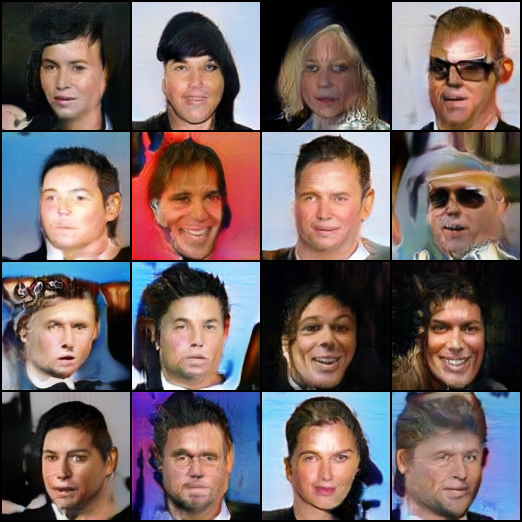

In [ ]:
G.eval()

with torch.no_grad():
    z = I_SIR(N_i, 16, N_p, 128, D, G)
    imgs = G(z).detach().cpu()
tv.transforms.ToPILImage()(make_grid(imgs, normalize=True, nrow=4))

In [ ]:
with torch.no_grad():
    d_out = D(G(torch.randn(16, 128, device=device)))
d_out

tensor([[2800.0251],
        [3465.0508],
        [4565.3784],
        [3599.6309],
        [5756.3174],
        [5646.4609],
        [3157.3364],
        [4628.8843],
        [2487.6228],
        [4908.1929],
        [2601.2285],
        [3260.1470],
        [2901.3291],
        [4433.6108],
        [4769.8384],
        [2827.9304]], device='cuda:0')

As we can see, Discriminator thinks, that all fake images are true, so this is can be explanation, why I-SIR method hadn't helped us.

# Problem 2. Signal processing (35 pts)

In this problem you are supposed to classify Electroencephalography (EEG) signals. You can solve the problem in two ways of your choice - using contrastive learning or using transformer.

## Dataset:

You will work with [EEG Motor Movement/Imagery Dataset (Sept. 9, 2009, midnight)](http://www.physionet.org/physiobank/database/eegmmidb/).
This data set consists of one-minute EEG recordings, obtained from 109 volunteers. 

We will consider Motor Imagenary experiment - a subject imagine opening and closing left or right fist. A target appears on either the left or the right side of the screen. The subject imagines opening and closing the corresponding fist until the target disappears. Then the subject relaxes.

The task is binary classify left and right hand movements from eeg signal.

Data loading \& requirements installation:

In [ ]:
!pip install -q mne
!pip install -q torcheeg
!pip install -q gdown

In [ ]:
import os
import mne
import numpy as np
from torcheeg import transforms
from torcheeg.datasets import MNEDataset
from torcheeg.model_selection import train_test_split_groupby_trial
import pandas as pd
import pickle
from copy import copy
from sklearn import model_selection

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
metadata_list = [{
    'subject': subject_id,
    'run': run_id
} for subject_id in range(1, 100) # download of experiment data for subjects 1-100 (during debbuging you can take data for fewer subjects)
                 for run_id in [4, 8, 12]]  # Motor imagery experiment: left vs right hand

epochs_list = []
for metadata in metadata_list:
    physionet_path = mne.datasets.eegbci.load_data(metadata['subject'],
                                                   metadata['run'],
                                                   update_path=False)[0]
    raw = mne.io.read_raw_edf(physionet_path, preload=True, stim_channel='auto')
    mne.datasets.eegbci.standardize(raw)

    montage = mne.channels.make_standard_montage('standard_1005')
    raw.set_montage(montage)

    raw.filter(7., 30., fir_design='firwin', skip_by_annotation='edge')
    events, _ = mne.events_from_annotations(raw, event_id=dict(T1=2, T2=3))
    picks = mne.pick_types(raw.info,
                           meg=False,
                           eeg=True,
                           stim=False,
                           eog=False,
                           exclude='bads')
    epochs_list.append(
        mne.Epochs(raw,
                   events,
                   dict(left=2, right=3),
                   tmin=-1.,
                   tmax=4.0,
                   proj=True,
                   picks=picks))

Using default location ~/mne_data for EEGBCI...
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 265 samples (1.656 sec)

Used Annotations descriptions: ['T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-1.0, 0.0] sec
Applying base

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 265 samples (1.656 sec)

Used Annotations descriptions: ['T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-1.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using default location ~/mne_data for EEGBCI...
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 265 samples (1.656 sec)

Used Annotations descriptions: ['T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-1.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using default location ~/mne_data for EEGBCI...
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S002/S002R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 265 samples (1.656 sec)

Used Annotations descriptions: ['T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-1.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using default location ~/mne_data for EEGBCI...
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S002/S002R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 265 samples (1.656 sec)

Used Annotations descriptions: ['T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-1.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using default location ~/mne_data for EEGBCI...
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S002/S002R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 265 samples (1.656 sec)

Used Annotations descriptions: ['T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-1.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using default location ~/mne_data for EEGBCI...
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S003/S003R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 265 samples (1.656 sec)

Used Annotations descriptions: ['T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-1.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using default location ~/mne_data for EEGBCI...
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S003/S003R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 265 samples (1.656 sec)

Used Annotations descriptions: ['T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-1.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using default location ~/mne_data for EEGBCI...
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S003/S003R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Used Annotations descriptions: ['T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-1.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using default location ~/mne_data for EEGBCI...
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S004/S004R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequ

[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S004/S004R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 265 samples (1.656 sec)

Used Annotations descriptions: ['T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-1.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Used Annotations descriptions: ['T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-1.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using default location ~/mne_data for EEGBCI...
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S005/S005R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequ

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Used Annotations descriptions: ['T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-1.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using default location ~/mne_data for EEGBCI...


[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


KeyboardInterrupt: 

Let's see what the EEG recording looks like:

In [ ]:
raw

<RawEDF | S005R04.edf, 64 x 19680 (123.0 s), ~9.7 MB, data loaded>

Using matplotlib as 2D backend.


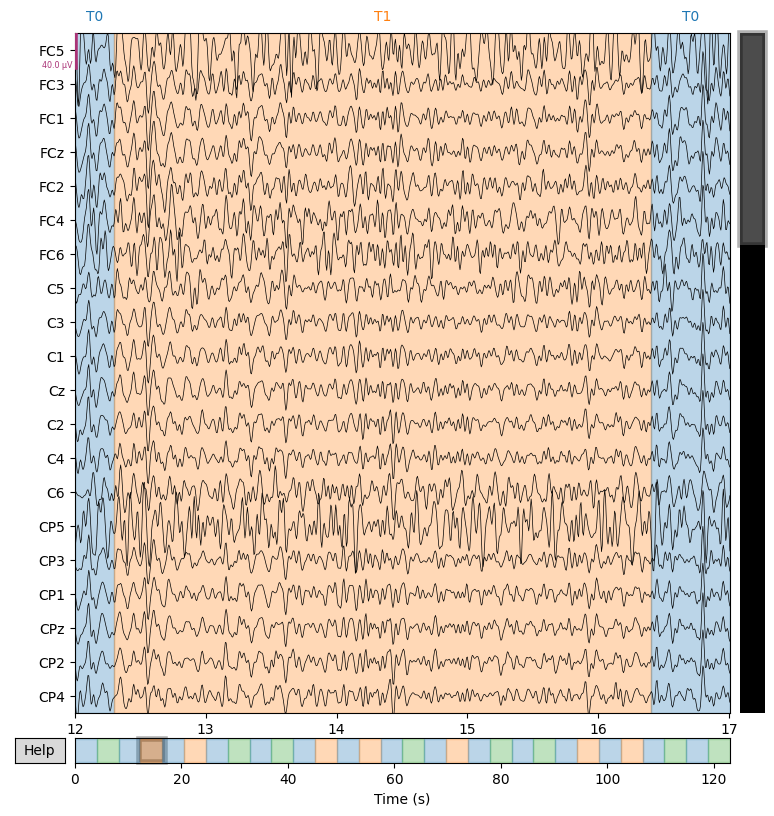

Effective window size : 1.600 (s)
Using data from preloaded Raw for 15 events and 801 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


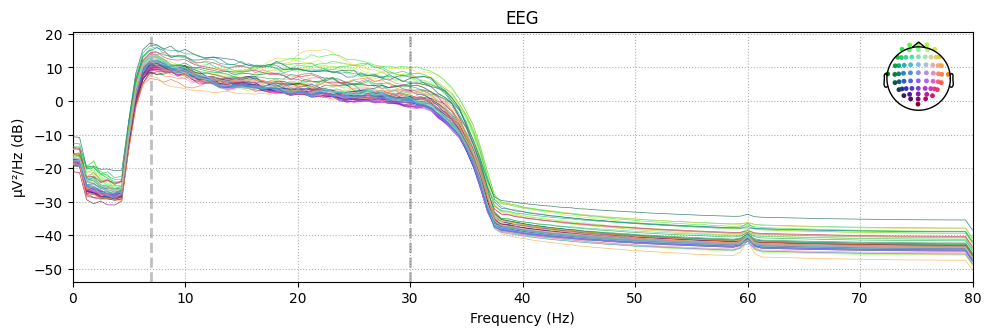

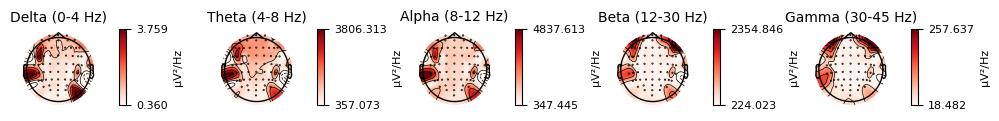

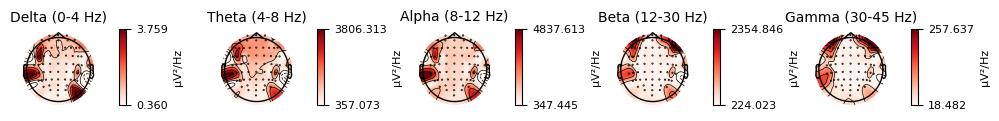

In [ ]:
raw.plot(start = 12, duration = 5)
raw.compute_psd().plot()
epochs_list[-1].compute_psd().plot_topomap()

In [ ]:
print(raw._data)
print("One sample data shape: ", raw._data.shape[0], "chanels x",  raw._data.shape[1], "signal length")

[[ 3.38813179e-21  3.16846803e-05  4.54027050e-05 ...  6.15991045e-05
   5.12237883e-05  7.07318921e-21]
 [-5.08219768e-21 -1.33894607e-06 -6.66845972e-07 ... -1.48912669e-05
  -9.77472072e-06 -3.79376130e-21]
 [-7.62329653e-21 -1.35773222e-05 -1.71946028e-05 ... -3.90431500e-05
  -2.67640184e-05  2.75755742e-22]
 ...
 [-4.02340650e-21 -2.60144395e-05 -3.22720894e-05 ... -8.49947975e-06
  -5.31957440e-06  1.65592884e-21]
 [-4.23516474e-22 -2.73816420e-05 -3.53125255e-05 ... -6.29841923e-06
  -2.07299417e-06 -2.07130342e-21]
 [-4.23516474e-22 -2.28343932e-05 -2.37336766e-05 ... -1.39966529e-05
  -8.19297429e-06  3.50284714e-21]]
One sample data shape:  64 chanels x 19680 signal length




Converting data into a usable form [[useful link]](https://torcheeg.readthedocs.io/en/latest/auto_examples/examples_mne_dataset.html):

In [ ]:
with open("epochs_list", "wb") as fp:   #Pickling
    pickle.dump(epochs_list, fp)

In [ ]:
!gdown 1YSRYIm5G62Dz9yfXPfAxBsKbQ-nisRVx # download prepared epochs_list

Downloading...
From (uriginal): https://drive.google.com/uc?id=1YSRYIm5G62Dz9yfXPfAxBsKbQ-nisRVx
From (redirected): https://drive.google.com/uc?id=1YSRYIm5G62Dz9yfXPfAxBsKbQ-nisRVx&confirm=t&uuid=16ece559-ce24-448e-a8fd-2073b270f6a9
To: /kaggle/working/epochs_list
100%|██████████████████████████████████████| 3.01G/3.01G [00:30<00:00, 98.8MB/s]


In [ ]:
with open("epochs_list", "rb") as fp:   # Unpickling
    epochs_list = pickle.load(fp)

metadata_list = [{
    'subject_id': subject_id,
    'run': run_id
} for subject_id in range(1, 100)
    for run_id in [4, 8, 12]]

In [ ]:
dataset = MNEDataset(epochs_list=epochs_list,
                     metadata_list=metadata_list,
                     chunk_size=160,
                     overlap=0,
                     io_path='./tmp_out/dataset/physionet',
                     offline_transform=transforms.Compose(
                         [transforms.MeanStdNormalize(),
                          transforms.To2d()]),
                     online_transform=transforms.ToTensor(),
                     label_transform=transforms.Compose([
                         transforms.Select('event'),
                         transforms.Lambda(lambda x: x - 2)
                     ]),
                     num_worker=2)

[MNE]:   0%|          | 0/297 [00:00<?, ?it/s]

The current io_size is not enough, and double the LMDB map size to 20971520 automatically.


[MNE]:   0%|          | 1/297 [00:00<03:47,  1.30it/s]

The current io_size is not enough, and double the LMDB map size to 41943040 automatically.


[MNE]:   2%|▏         | 6/297 [00:02<01:26,  3.37it/s]

The current io_size is not enough, and double the LMDB map size to 83886080 automatically.


[MNE]:   4%|▍         | 12/297 [00:03<01:19,  3.58it/s]

The current io_size is not enough, and double the LMDB map size to 167772160 automatically.


[MNE]:   8%|▊         | 25/297 [00:06<01:07,  4.05it/s]

The current io_size is not enough, and double the LMDB map size to 335544320 automatically.


[MNE]:  16%|█▋        | 49/297 [00:14<01:27,  2.85it/s]

The current io_size is not enough, and double the LMDB map size to 671088640 automatically.

[MNE]:  17%|█▋        | 51/297 [00:14<01:12,  3.38it/s]

[MNE]:  35%|███▍      | 103/297 [00:27<00:41,  4.65it/s]

The current io_size is not enough, and double the LMDB map size to 1342177280 automatically.


[MNE]:  69%|██████▉   | 206/297 [00:53<00:24,  3.66it/s]

The current io_size is not enough, and double the LMDB map size to 2684354560 automatically.


[MNE]: 100%|██████████| 297/297 [01:17<00:00,  3.82it/s]


Please wait for the writing process to complete...


In [ ]:
def train_test_split_groupby_trial(dataset, 
        test_size = 0.2,
        shuffle = False,
        random_state = None,
        split_path='./dataset/train_test_split_groupby_trial'):
    if not os.path.exists(split_path):
        os.makedirs(split_path)
        info = dataset.info
        train_info = None
        test_info = None

        for subject in info['subject_id'].unique():
            for trial_id in info.loc[info['subject_id'] == subject, 'trial_id'].unique():
                cur_info = info[(info['subject_id'] == subject)
                                & (info['trial_id'] == trial_id)].reset_index()
                n_samples = len(cur_info)
                indices = np.arange(n_samples)
                train_index, test_index = model_selection.train_test_split(
                    indices,
                    test_size=test_size,
                    random_state=random_state,
                    shuffle=shuffle)

                if train_info is None and test_info is None:
                    train_info = cur_info.iloc[train_index]
                    test_info = cur_info.iloc[test_index]
                else:
                    train_info = pd.concat([train_info, cur_info.iloc[train_index]])
                    test_info = pd.concat([test_info, cur_info.iloc[test_index]])

        train_info.to_csv(os.path.join(split_path, 'train.csv'), index=False)
        test_info.to_csv(os.path.join(split_path, 'test.csv'), index=False)

    train_info = pd.read_csv(os.path.join(split_path, 'train.csv'))
    test_info = pd.read_csv(os.path.join(split_path, 'test.csv'))

    train_dataset = copy(dataset)
    train_dataset.info = train_info

    test_dataset = copy(dataset)
    test_dataset.info = test_info

    return train_dataset, test_dataset

In [ ]:
train, val = train_test_split_groupby_trial(dataset, shuffle=True, test_size=0.2, split_path='./split')

## Contrastive learning approach (35 pts)


Obtaining EEG signals is generally straightforward, but labeling them is a costly and challenging task that requires extensive medical training. Additionally, EEG datasets often have noisy labels and limited numbers of subjects (less than 100). While supervised learning has been commonly used in the EEG signal analysis field, it has limitations in terms of generalization performance due to the scarcity of annotated data. Self-supervised learning, which is a popular learning paradigm in CV and NLP, can leverage unlabeled data to compensate for the shortage of supervised learning data.

Related articles:
*   http://proceedings.mlr.press/v136/mohsenvand20a/mohsenvand20a.pdf
*   https://arxiv.org/abs/2109.07839
*   https://arxiv.org/pdf/2106.14112.pdf


Your task is to adapt and fine-tune SimCLR to the problem. You are free to implement the task in any way. 

However, suggested pipeline is:


* Channel recombination (3pts)

To obtain additional valid channels from a multi-channel EEG recording, it is possible to recombine channels. Each channel of an EEG captures the voltage difference between a sensor and a common reference. By subtracting the voltage readings from two channels, a new channel can be created that represents the voltage difference between those two sensors. This approach can yield additional channels with meaningful neurophysiological information.


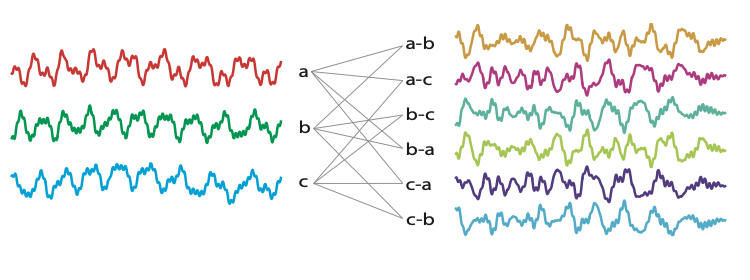

In [ ]:
def channel_recombination(channels): # recombination channels
    assert len(channels.size()) == 2
    
    recombined = (channels.unsqueeze(0) - channels.unsqueeze(1)).reshape(-1, channels.size(-1))
    for i in range(len(channels)):
        recombined[i+i*channels.size(0)] = channels[i] #insert zero vectors with original channels
    
    return recombined

However, usage of recombination dramatically increases number of channels, so it hard to fit into RAM. Because number of channels in our case will be more than 4096 * 20000 $\sim$ 8*10^7.


* Channel augmentations (3pts)

An essential element of the contrastive learning approach involves augmentations that do not affect the semantic information of data. A contrastive learning algorithm learns representations that are maximally similar for augmented instances of the same data-point and minimally similar for differ- ent data-points. For instance, the rotation of images or amplifying the amplitude of audio signals can significantly alter the numerical values of data, but not its meaning. Identifying a set of these augmentations can enable us to construct a self-supervised pretext task with the goal of generating features that are invulnerable to transformations and preserve the crucial content of EEG signals.


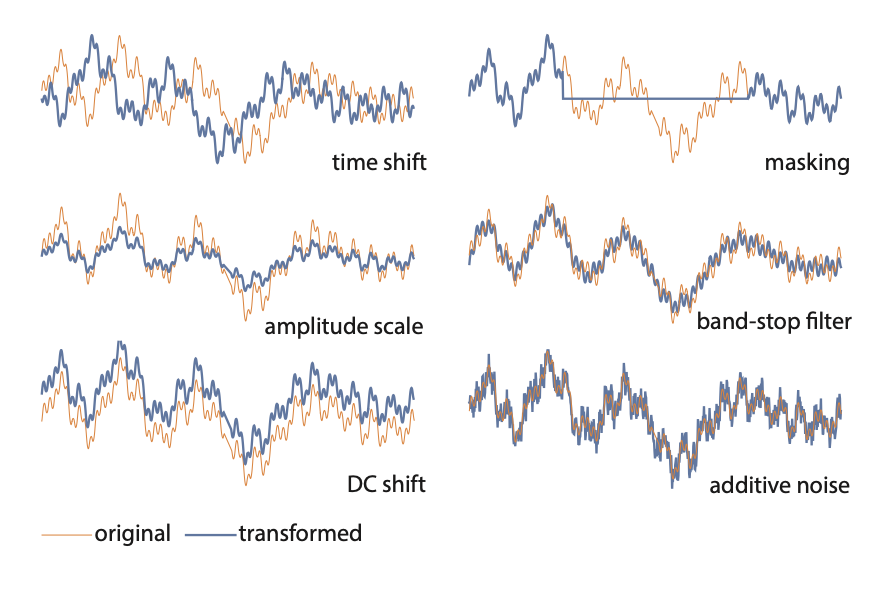

In [ ]:
def aug_time_shift(channels):
    shift = torch.randint(-50, 51, (1, ))
    aug_channels = torch.roll(channels, shifts=shift.item(), 
                              dims=len(channels.size())-1)
    return aug_channels

def aug_amp_scale(channels):
    scale = -1.5 * torch.rand(channels.size(0), 1) + 2
    return channels / scale

def aug_DC_shift(channels):
    shift = torch.randint(-10, 11, (channels.size(0), 1))
    return channels + shift

def aug_masking(channels):
    start = torch.randint(0, channels.size(-1), (channels.size(0), ))
    length = torch.randint(0, 150, (channels.size(0), ))
    aug_channels = channels.clone()
    for i in range(aug_channels.size(0)):
        aug_channels[i, start[i]:start[i]+length[i]] = 0
    return aug_channels

def aug_noise(channels):
    sigma = -0.2 * torch.rand(channels.size()) + 0.2
    return channels + torch.normal(0.0, sigma)

def aug_band(channels):
    aug_channels = channels.clone()
    freq = (2.8 - 82.5) * torch.rand(channels.size(0)) + 82.5
    for i in range(aug_channels.size(0)):
        aug_channels[i] = bandreject_biquad(aug_channels[i], 160.0, freq[i])
    
    return aug_channels

class Augmenter:
    def __init__(self):
        self.augmentations = [aug_time_shift, aug_amp_scale, aug_DC_shift,
                              aug_masking, aug_noise, aug_band]
    
    def __call__(self, channels):
        augmentation1 = torch.randint(0, len(self.augmentations), (1,))
        augmentation2 = torch.randint(0, len(self.augmentations), (1,))

        augmented1 = self.augmentations[augmentation1](channels)
        augmented2 = self.augmentations[augmentation2](channels)
        return augmented1, augmented2
    

Modification variant of SimCLR proposed for EEG classification:

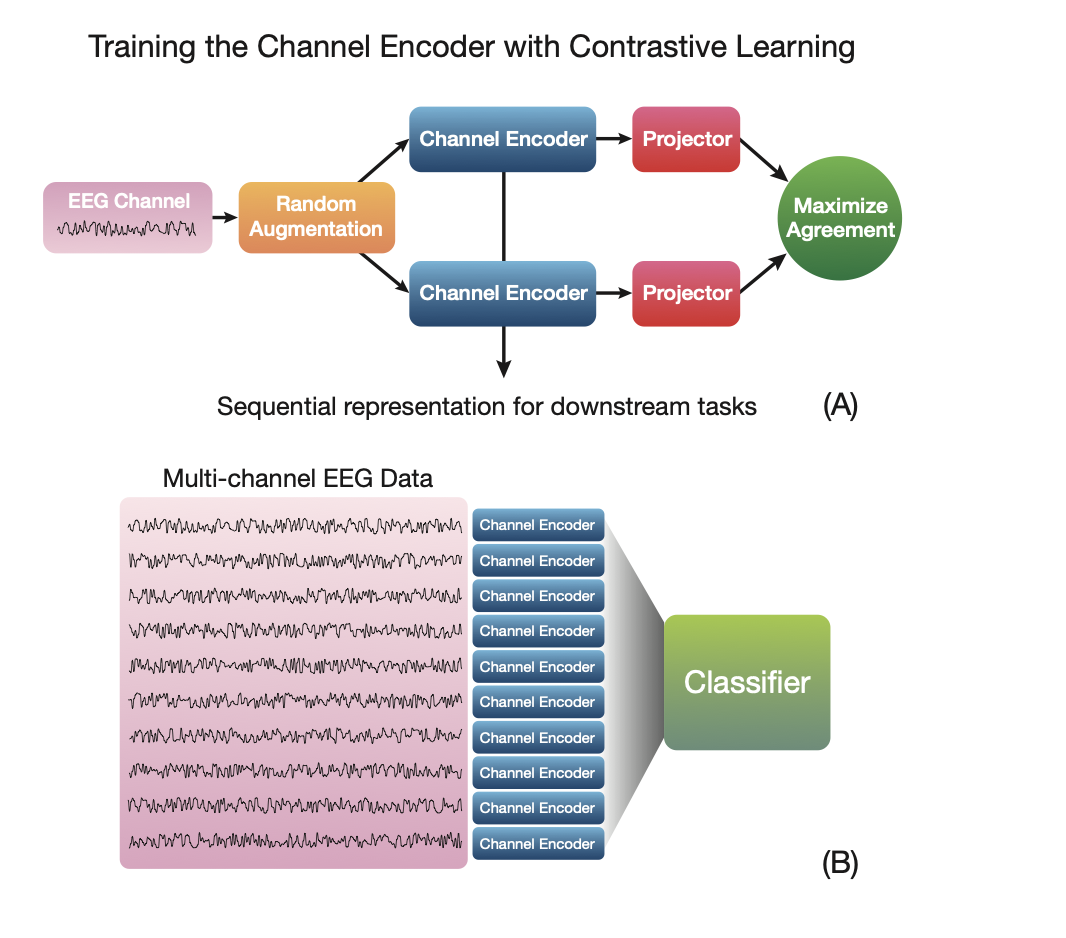

The model pipline consist of following bloks:


1. **Channel Encoder** (see picture below (A) and (B)) (4pts)
2. **Projector** (see picture below (C)) (4pts)
3. **Contrastive Loss** (4pts) Given a set $\left\{\boldsymbol{x}_k\right\}$ including a positive pair of channels $\boldsymbol{x}_i$ and $\boldsymbol{x}_j$, the contrastive task aims to identify $\boldsymbol{x}_j$ in $\left\{\boldsymbol{x}_k\right\}_{k \neq i}$ for a given $\boldsymbol{x}_i$. Assuming that $\boldsymbol{z}_i$ and $\boldsymbol{z}_j$ are the outputs of the projector for the positive pair of $\boldsymbol{x}_i$ and $\boldsymbol{x}_j$, the NT-Xent loss term for the positive pair is defined as:
$$
\ell_{i, j}=-\log \frac{\exp \left(\operatorname{sim}\left(\boldsymbol{z}_i, \boldsymbol{z}_j\right) / \tau\right)}{\sum_{k \neq i}^{2 N} \exp \left(\operatorname{sim}\left(\boldsymbol{z}_i, \boldsymbol{z}_k\right) / \tau\right)},
$$
where $\operatorname{sim}(\boldsymbol{u}, \boldsymbol{v})$ is the cosine similarity of $\boldsymbol{u}$ and $\boldsymbol{v}$ and $\tau$ is the temperature parameter. The final loss is the average of $\ell_{i, j}$ for all positive pairs in both orders $(i, j$ and $j, i)$.

4. **Classifier** (4pts)
A classifier almost identical to the projector with two differences: (1) the output dimension of the last dense layer is set to the number of classes (two in the current problem), and (2) a LogSoftmax layer is added afterward. 

(See more details in [paper](http://proceedings.mlr.press/v136/mohsenvand20a/mohsenvand20a.pdf))

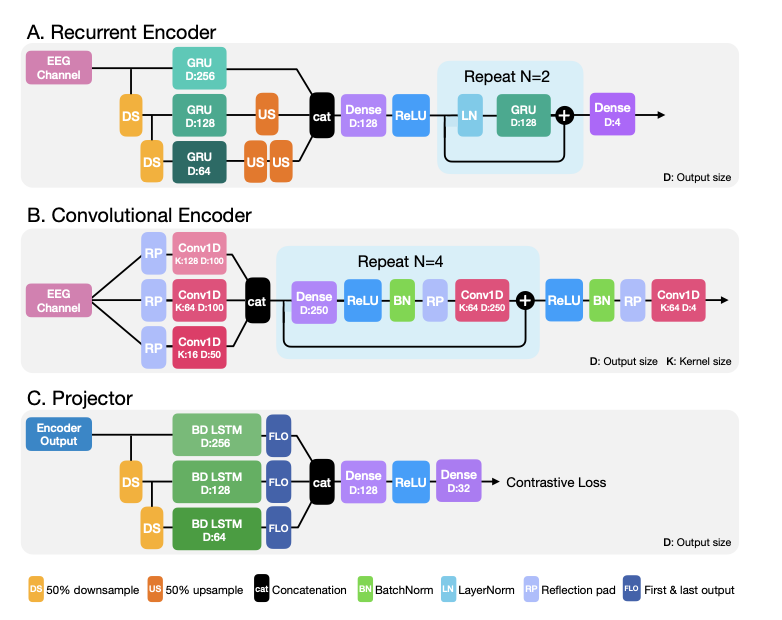

* **Data loader, Train loop \& Model trainig** (8pts)

* **Evaluate model**

Provide confusion matrix, F1 score, and loss curve.(3pts)

Report on obtained results.(2pts)





**You need to implement ONE of the two approaches!**

Ссылка на веса енкодера и проектора: https://drive.google.com/file/d/1Pyd_xcUnv6IsR0XAnN9-QPA-_PR7AZLI/view?usp=share_link

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
import gc
import matplotlib.pyplot as plt
from torchmetrics.classification import BinaryConfusionMatrix, BinaryF1Score, BinaryAccuracy
from torchaudio.functional import bandreject_biquad

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
class EEGChannelsDataset:
    def __init__(self, dataset):
        self.channels = []
        self.preprocess(dataset)
    
    def preprocess(self, dataset):
        '''applying channel recombination'''
        for sample in dataset:
            self.channels.append(sample[0][0])
        
        self.channels = torch.cat(self.channels)

    def __len__(self):
        return len(self.channels)
    
    def __getitem__(self, idx):
        return self.channels[idx]

In [ ]:
class RPConv(nn.Module):
    def __init__(self, padding, kernel_size, cout):
        super(RPConv, self).__init__()
        self.pad = nn.ReflectionPad1d(padding)
        self.conv = nn.Conv1d(1, cout, kernel_size=kernel_size)
    
    def forward(self, x):
        out = self.pad(x)
        out = self.conv(out)
        return out

class SubLayer(nn.Module):
    def __init__(self):
        super(SubLayer, self).__init__()
        self.linear = nn.Linear(160, 250)
        self.relu = nn.ReLU()
        self.bn = nn.BatchNorm1d(125)
        self.pad = nn.ReflectionPad1d((18, 18))
        self.conv = nn.Conv1d(125, 125, kernel_size=64, dilation=2)
    
    def forward(self, x):
        out = self.relu(self.linear(x))
        out = self.bn(out)
        out = self.conv(self.pad(out))
        return out

class ChannelEncoder(nn.Module):
    def __init__(self):
        super(ChannelEncoder, self).__init__()
        self.rpconv1 = RPConv((64, 63), 128, 50)
        self.rpconv2 = RPConv((32, 31), 64, 50)
        self.rpconv3 = RPConv((8, 7), 16, 25)
        self.sublayers = nn.Sequential(*[SubLayer() for _ in range(4)])
        self.relu = nn.ReLU()
        self.bn = nn.BatchNorm1d(125)
        self.pad = nn.ReflectionPad1d((32, 31))
        self.conv = nn.Conv1d(125, 4, kernel_size=64)

    def forward(self, x):
        out = torch.cat([self.rpconv1(x), self.rpconv2(x), self.rpconv3(x)], dim=1)
        for layer in self.sublayers:
            out = out + layer(out)
        out = self.bn(self.relu(out))
        out = self.conv(self.pad(out))
        return out

class Projector(nn.Module):
    def __init__(self):
        super(Projector, self).__init__()
        self.lstm1 = nn.LSTM(input_size=4, hidden_size=256, 
                             num_layers=1, batch_first=True, bidirectional=True)
        self.lstm2 = nn.LSTM(input_size=4, hidden_size=128, 
                             num_layers=1, batch_first=True, bidirectional=True)
        self.lstm3 = nn.LSTM(input_size=4, hidden_size=64, 
                             num_layers=1, batch_first=True, bidirectional=True)
        self.downsample = nn.AvgPool1d(2, 2) #nn.Conv1d(4, 4, 2, stride=2) 
        self.dense1 = nn.Linear(896, 128)
        self.relu = nn.ReLU()
        self.dense2 = nn.Linear(128, 32)
    
    def forward(self, x):
        _, (hn1, _) = self.lstm1(x.transpose(1, 2))
        downsampled = self.downsample(x)
        _, (hn2, _) = self.lstm2(downsampled.transpose(1, 2))
        downsampled = self.downsample(downsampled)
        _, (hn3, _) = self.lstm3(downsampled.transpose(1, 2))
        out = torch.cat([hn1.transpose(0, 1).reshape(x.size(0), -1),
                         hn2.transpose(0, 1).reshape(x.size(0), -1),
                         hn3.transpose(0, 1).reshape(x.size(0), -1)], dim=1)
        out = self.dense2(self.relu(self.dense1(out)))
        return out
        
class ContrastiveLoss(nn.Module):
    def __init__(self, tau=5e-2):
        super(ContrastiveLoss, self).__init__()
        self.register_buffer("tau", torch.tensor(tau))
    
    def forward(self, emb_i, emb_j):
        batch_size = len(emb_i)
        z_i = F.normalize(emb_i, dim=1)
        z_j = F.normalize(emb_j, dim=1)

        representations = torch.cat([z_i, z_j], dim=0)
        similarity_matrix = F.cosine_similarity(representations.unsqueeze(1), 
                                                representations.unsqueeze(0), dim=2)
        

        sim_ij = torch.diag(similarity_matrix, batch_size)
        sim_ji = torch.diag(similarity_matrix, -batch_size)
        positives = torch.cat([sim_ij, sim_ji], dim=0)
        nominator = torch.exp(positives / self.tau)
        mask = (~torch.eye(batch_size * 2, dtype=bool)).float()
        denominator = mask.to(device) * torch.exp(similarity_matrix / self.tau)
        loss_partial = -torch.log(nominator / torch.sum(denominator, dim=1))
        loss = torch.sum(loss_partial) / (2 * batch_size)
        return loss
    
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.lstm1 = nn.LSTM(input_size=256, hidden_size=256, 
                             num_layers=1, batch_first=True, bidirectional=True)
        self.lstm2 = nn.LSTM(input_size=256, hidden_size=128, 
                             num_layers=1, batch_first=True, bidirectional=True)
        self.lstm3 = nn.LSTM(input_size=256, hidden_size=64, 
                             num_layers=1, batch_first=True, bidirectional=True)
        self.downsample = nn.AvgPool1d(2, 2)
        self.dense1 = nn.Linear(896, 128)
        self.relu = nn.ReLU()
        self.dense2 = nn.Linear(128, 2)
    
    def forward(self, x):
        _, (hn1, _) = self.lstm1(x.transpose(1, 2))
        downsampled = self.downsample(x)
        _, (hn2, _) = self.lstm2(downsampled.transpose(1, 2))
        downsampled = self.downsample(downsampled)
        _, (hn3, _) = self.lstm3(downsampled.transpose(1, 2))
        out = torch.cat([hn1.transpose(0, 1).reshape(x.size(0), -1),
                         hn2.transpose(0, 1).reshape(x.size(0), -1),
                         hn3.transpose(0, 1).reshape(x.size(0), -1)], dim=1)
        out = self.dense2(self.relu(self.dense1(out)))
        return out

In [ ]:
class SeqCLR(nn.Module):
    def __init__(self, encoder, projector):
        super(SeqCLR, self).__init__()
        self.encoder = encoder
        self.projector = projector
    
    def forward(self, x):
        return self.projector(self.encoder(x))

In [ ]:
encoder_batch_size = 500

encoder_dataset = EEGChannelsDataset(train)
encoder_dataloader = torch.utils.data.DataLoader(dataset=encoder_dataset, 
                                         batch_size=encoder_batch_size, 
                                         shuffle=True, 
                                         num_workers=2,
                                         drop_last=False)

In [ ]:
encoder = ChannelEncoder().to(device)
projector = Projector().to(device)
seqclr = SeqCLR(encoder, projector)
augmenter = Augmenter()
encoder_loss = ContrastiveLoss(tau=5e-2)

# optimizer_encoder = torch.optim.Adam(encoder.parameters(), lr=1e-4, weight_decay=1e-5)
# optimizer_projector = torch.optim.Adam(projector.parameters(), lr=1e-4, weight_decay=1e-5)
optimizer_clr = torch.optim.Adam(seqclr.parameters(), lr=1e-4, weight_decay=1e-3)

In [ ]:
# encoder.train()
# projector.train()
seqclr.train()
gc.collect()
torch.cuda.empty_cache()

In [ ]:
def train_epoch_encoder(dataloader):
    pbar = tqdm(dataloader)
    running_loss = []
    for step, batch in enumerate(pbar):
        augs1, augs2 = augmenter(batch)
        
        encoded1 = seqclr(augs1.unsqueeze(1).to(device))
        encoded2 = seqclr(augs2.unsqueeze(1).to(device))
        loss = encoder_loss(encoded1, encoded2)
        running_loss.append(loss.item())
        
        optimizer_clr.zero_grad()
        loss.backward()
        optimizer_clr.step()
#         optimizer_encoder.zero_grad()
#         optimizer_projector.zero_grad()
#         loss.backward()
#         optimizer_encoder.step()
#         optimizer_projector.step()

        pbar.set_description(f"loss {loss.item()}")
    
    return running_loss

In [ ]:
num_epochs = 1

enc_loss = []
for epoch in range(num_epochs):
    epoch_loss = train_epoch_encoder(encoder_dataloader)
    print(f'train epoch {epoch+1} loss: {np.mean(epoch_loss)}')
    enc_loss += epoch_loss

loss 0.04377255588769913: 100%|██████████| 2271/2271 [50:01<00:00,  1.32s/it]

train epoch 1 loss: 2.595313232265764


In [ ]:
torch.save({'encoder': encoder.state_dict(),
            'projector': projector.state_dict(),
            'optimizer_seqclr': optimizer_clr.state_dict(),
            }, 'seqclr.pt')

In [ ]:
checkpoint = torch.load('seqclr.pt')
encoder.load_state_dict(checkpoint['encoder'])
projector.load_state_dict(checkpoint['projector'])
optimizer_clr.load_state_dict(checkpoint['optimizer_seqclr'])

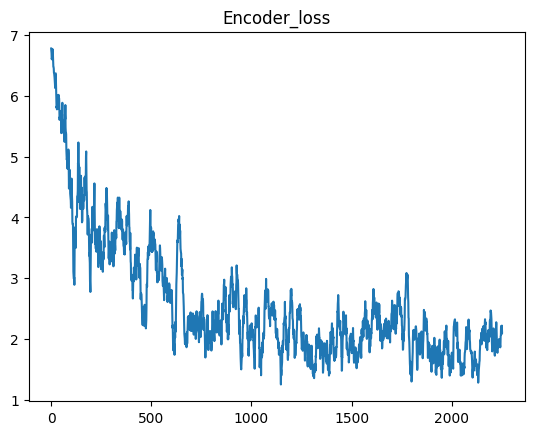

In [ ]:
plt.plot(np.convolve(enc_loss, np.ones(20),"valid") / 20)
plt.title('Encoder_loss')
plt.show()

In [ ]:
gc.collect()
torch.cuda.empty_cache()

In [ ]:
batch_size = 64
train_dataloader = torch.utils.data.DataLoader(dataset=train, 
                                         batch_size=batch_size, 
                                         shuffle=True, 
                                         num_workers=2,
                                         drop_last=False)
val_dataloader = torch.utils.data.DataLoader(dataset=val, 
                                         batch_size=batch_size, 
                                         shuffle=True, 
                                         num_workers=2,
                                         drop_last=False)

In [ ]:
clf_loss = nn.CrossEntropyLoss()
clf = Classifier().to(device)
optimizer_clf = torch.optim.Adam(clf.parameters(), lr=1e-4, weight_decay=1e-5)

encoder.train()
for param in encoder.parameters():
    param.requires_grad = True

optimizer_encoder = torch.optim.Adam(encoder.parameters(), lr=1e-4, weight_decay=1e-5)

In [ ]:
def train_epoch_classifier(dataloader):
    pbar = tqdm(dataloader)
    running_loss = []
    running_acc = 0.0
    for step, (X, y) in enumerate(pbar):
        enc = encoder(X.reshape(-1, 1, X.size(-1)).to(device))
        out = clf(enc.reshape(len(X), -1, enc.size(-1)))
        loss = clf_loss(out, y.to(device))
        running_loss.append(loss.item())
        predict = torch.argmax(out.cpu(), dim=1)
        acc = (predict == y).to(float).sum()
        running_acc += acc.item()
        
        optimizer_encoder.zero_grad()
        optimizer_clf.zero_grad()
        loss.backward()
        optimizer_clf.step()
        optimizer_encoder.step()
        
        pbar.set_description(f"train loss: {running_loss[-1]}, accuracy: {acc.item() / len(y)}")
    
    return running_loss, running_acc / len(dataloader.dataset)

def val_epoch_classifier(dataloader):
    pbar = tqdm(dataloader)
    running_loss = []
    running_acc = 0.0
    clf.eval()
    for step, (X, y) in enumerate(pbar):
        enc = encoder(X.reshape(-1, 1, X.size(-1)).to(device))
        out = clf(enc.reshape(len(X), -1, enc.size(-1)))
        loss = clf_loss(out, y.to(device))
        running_loss.append(loss.item())
        predict = torch.argmax(out.cpu(), dim=1)
        acc = (predict == y).to(float).sum()
        running_acc += acc.item()
        
        pbar.set_description(f"val loss: {running_loss[-1]}, accuracy: {acc.item() / len(y)}")
    
    return running_loss, running_acc / len(dataloader.dataset)

In [ ]:
num_epochs = 3

train_loss = []
val_loss = []
train_acc = []
val_acc = []
for epoch in range(num_epochs):
    clf.train()
    encoder.train()
    epoch_loss, epoch_acc = train_epoch_classifier(train_dataloader)
    print(f'train epoch {epoch+1} loss: {np.mean(epoch_loss)}, accuracy: {epoch_acc}')
    train_loss += epoch_loss
    train_acc.append(epoch_acc)
    
    clf.eval()
    encoder.eval()
    with torch.no_grad():
        epoch_loss, epoch_acc = val_epoch_classifier(val_dataloader)
        print(f'val epoch {epoch+1} loss: {np.mean(epoch_loss)}, accuracy: {epoch_acc}')
        val_loss += epoch_loss
        val_acc.append(epoch_acc)

gc.collect()
torch.cuda.empty_cache()

train loss: 0.6595911979675293, accuracy: 0.5: 100%|██████████| 278/278 [19:43<00:00,  4.26s/it]     


train epoch 1 loss: 0.6799686214477896, accuracy: 0.5606043522381329


val loss: 0.6519377827644348, accuracy: 0.6382978723404256: 100%|██████████| 70/70 [00:56<00:00,  1.23it/s]


val epoch 1 loss: 0.6867975975785937, accuracy: 0.5395473896482187


train loss: 0.5974289178848267, accuracy: 0.6: 100%|██████████| 278/278 [19:43<00:00,  4.26s/it]     


train epoch 2 loss: 0.6644514640458197, accuracy: 0.5943736610666366


val loss: 0.6725406050682068, accuracy: 0.6170212765957447: 100%|██████████| 70/70 [00:56<00:00,  1.24it/s]


val epoch 2 loss: 0.6893491642815727, accuracy: 0.5382030024647099


In [ ]:
train_loss = np.array(train_loss).reshape(num_epochs, -1).mean(axis=1)
val_loss = np.array(val_loss).reshape(num_epochs, -1).mean(axis=1)

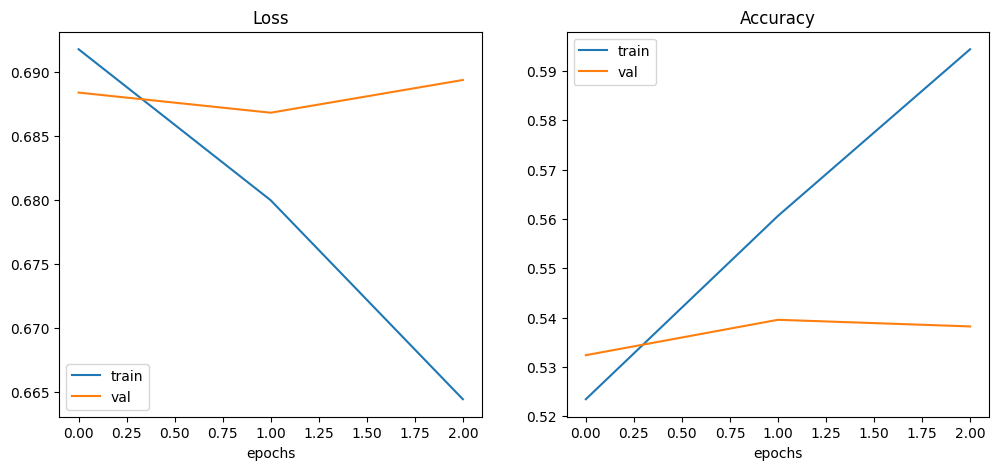

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.plot(train_loss, label='train')
ax1.plot(val_loss, label='val')
ax1.set_title('Loss')
ax1.set_xlabel('epochs')
ax1.legend()

ax2.plot(train_acc, label='train')
ax2.plot(val_acc, label='val')
ax2.set_title('Accuracy')
ax2.set_xlabel('epochs')
ax2.legend()

plt.show()

In [ ]:
clf.eval()
encoder.eval()
preds = []
targets = []
with torch.no_grad():
    for X, y in tqdm(val_dataloader):
        enc = encoder(X.reshape(-1, 1, X.size(-1)).to(device))
        out = clf(enc.reshape(len(X), -1, enc.size(-1)))
        predict = torch.argmax(out.cpu(), dim=1)
        preds.append(predict)
        targets.append(y)

preds = torch.cat(preds)
targets = torch.cat(targets)

100%|██████████| 70/70 [00:56<00:00,  1.24it/s]


In [ ]:
bcm = BinaryConfusionMatrix()
f1 = BinaryF1Score()
acc = BinaryAccuracy()

print(f'Confusion matrix: \n{bcm(preds, targets)}')
print()
print(f'F1-score: {f1(preds, targets)}')
print(f'Accuracy: {acc(preds, targets)}')

Confusion matrix: 
tensor([[1211, 1047],
        [1014, 1191]])

F1-score: 0.5361242294311523
Accuracy: 0.5382030010223389


As we can see, result is slightly better than random decision. But it is really hard to achieve 0.7 score on validation. 

What I recorded during SeqCLR training:

1) Temperature of NTXent-loss is really matters. When I used high values of tau, loss hadn't dropped. Only small values helped to train encoder. But too small values, like 0.05, turned loss to nan, because of too high values of exponent, so torch turned it into infinity.

2) The more powerful encoder - the lesser loss, too weak encoder architecture couldn't learn patterns of channels. I tried to reduce parameters of convolution encoder, which gave me worse result.

3) Appropriate choice of lr should be done, otherwise training of encoder could fail. Higher than 1e-3 is bad.

4) What about classification, classifier can learn training data, without any visible difficulties. But what about validation data, results on it not really increasing. But with better encoder results improving.

For better performance I think we need to use better architecture, or train much more epochs.

## Transformer approach (35 pts)

The Transformer architecture has primarily found fame in processing natural language due to its excellent aptitude for analyzing long-range dependencies - this is beyond the fundamental capabilities delivered by conventional neural networks like CNN and RNN. As EEG classification significantly relies on capturing sequential relationships within the vast array of channels and time points, it has proven to be a difficult task, one that has frequently depended on pre-processing and hands-on feature extraction. However, deep learning with Transformer networks can remove the need for these preliminary steps by leveraging the attention mechanism to extract feature correlations in long-sequential EEG data, which helps visualize the model and appreciate the crucial spatial and temporal relationships in the raw data.

Related articles:
* https://www.nature.com/articles/s41598-022-18502-3
* https://arxiv.org/abs/2202.05170
* https://ieeexplore.ieee.org/document/9391844


In this task you need to implement transformer (you can use ViT transformers, but as a patch you need to use slice - signals splitted along the time dimension) *from scrath* .

**You need to implement ONE of the two approaches!**

### Code blocks (12 pts)

In [ ]:
! python3 -m pip install einops -q
from einops import rearrange

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
import gc
import matplotlib.pyplot as plt
from torchmetrics.classification import BinaryConfusionMatrix, BinaryF1Score, BinaryAccuracy
from torchaudio.functional import bandreject_biquad

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
def sample2patches(sample, patch_size=16):
    return rearrange(sample, 'batch_size c (h ph) -> batch_size h (c ph)', 
                     ph=patch_size)

In [ ]:
class MultiHeadAttention(nn.Module):
    def __init__(self, dim, num_heads=8):
        super().__init__()
        if dim % num_heads:
            raise ValueError('dim % num_heads != 0')
        self.dim = dim
        self.num_heads = num_heads
        self.head_dim = dim // num_heads
        self.scale = self.head_dim ** -0.5
        self.qkv = nn.Linear(dim, dim * 3, bias=False)
        self.proj = nn.Linear(dim, dim)
        self.dropout = nn.Dropout(p=0.1)

    def forward(self, x):
        '''
        Args: 
            x: Tensor of shape (batch_size, seq_len, input_dim)
            
        Returns:
            Tensor of shape (batch_size, seq_len, input_dim)
        '''
        B, N, C = x.shape
        qkv = self.qkv(x).reshape(B, N, 3, self.num_heads, self.head_dim).permute(2, 0, 3, 1, 4)
        # qkv: 3 × B × num_heads × N × head_dim
        q, k, v = qkv.unbind(0)
        q = q * self.scale
        attn = q @ k.transpose(-2, -1)
        attn = attn.softmax(dim=-1)
        x = attn @ v  # attn: B × num_heads × N × N    v: B × num_heads × N × head_dim
        x = self.dropout(x)
        # B × num_heads × N × head_dim
        x = x.transpose(1, 2).reshape(B, N, C) 
        # B × N × (num_heads × head_dim)
        x = self.proj(x)
        return x

class Block(nn.Module):

    def __init__(
            self,
            dim,
            num_heads,
            mlp_ratio=4,  # ratio between hidden_dim and input_dim in MLP
            act_layer=nn.GELU,
            norm_layer=nn.LayerNorm
    ):
        super().__init__()
        self.norm1 = norm_layer(dim)
        self.attn = MultiHeadAttention(dim, num_heads=num_heads)
        self.norm2 = norm_layer(dim)
        self.mlp = nn.Sequential(nn.Linear(dim, dim * mlp_ratio), 
                                 act_layer(), 
                                 nn.Linear(dim * mlp_ratio, dim))

    def forward(self, x):
        x = x + self.attn(self.norm1(x))
        x = x + self.mlp(self.norm2(x))
        return x

class ViT(nn.Module):
    def __init__(
                    self,
                    seq_size=160,
                    patch_size=16,
                    in_chans=64,
                    num_classes=2,
                    embed_dim=768,
                    depth=12,
                    num_heads=12,
                    mlp_ratio=4,
                    norm_layer=nn.LayerNorm,
                    act_layer=nn.GELU
            ):
        # Your code is here
        super().__init__()
        self.patch_size = patch_size
        self.blocks = nn.Sequential(*[
            Block(embed_dim, num_heads, mlp_ratio, act_layer, norm_layer) for _ in range(depth)
        ])
        self.patch_proj = nn.Linear(in_chans * patch_size, embed_dim)
        self.embed_len = seq_size // patch_size
        self.pos_embed = nn.Parameter(torch.randn(1, self.embed_len, embed_dim) * .02)
        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))
        self.head = nn.Linear(embed_dim, num_classes)
        
    def forward(self, x):
        '''
        Args: 
            x: (batch_size, in_channels, img_size[0], img_size[1])
            
        Return:
            (batch_size, num_classes)
        '''
        x = sample2patches(x, patch_size=self.patch_size)
        x = self.patch_proj(x)
        x = x + self.pos_embed
        x = torch.cat((self.cls_token.expand(x.shape[0], -1, -1), x), dim=1)
        x = self.blocks(x)
        x = x[:, 0, :]  # take CLS token
        return self.head(x)

In [ ]:
batch_size = 64
train_dataloader = torch.utils.data.DataLoader(dataset=train, 
                                         batch_size=batch_size, 
                                         shuffle=True, 
                                         num_workers=2,
                                         drop_last=False)
val_dataloader = torch.utils.data.DataLoader(dataset=val, 
                                         batch_size=batch_size, 
                                         shuffle=True, 
                                         num_workers=2,
                                         drop_last=False)

In [ ]:
model = ViT(seq_size=160,
            patch_size=20,
            in_chans=64,
            num_classes=2).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=0)
#scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, 0.8)
lossfn = nn.CrossEntropyLoss()

In [ ]:
def train_epoch(dataloader, log_delay=100):
    pbar = tqdm(dataloader)
    running_loss = []
    running_acc = 0.0
    model.train()
    for step, (X, y) in enumerate(pbar):
#         if torch.rand(1) > 0.5:
#             aug = augmenter(X.reshape(-1, X.size(-1)))
#             X = aug.reshape(X.size(0), -1, X.size(-1))
#         else:
        X = X.squeeze(1)
        out = model(X.to(device))
        loss = lossfn(out, y.to(device))
        running_loss.append(loss.item())
        predict = torch.argmax(out.cpu(), dim=1)
        acc = (predict == y).to(float).sum()
        running_acc += acc.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if not (step % log_delay):
            pbar.set_description(f"train loss: {running_loss[-1]}, accuracy: {acc.item() / len(y)}")
    
    return running_loss, running_acc / len(dataloader.dataset)

def val_epoch(dataloader, log_delay=100):
    pbar = tqdm(dataloader)
    running_loss = []
    running_acc = 0.0
    model.eval()
    for step, (X, y) in enumerate(pbar):
        out = model(X.squeeze(1).to(device))
        loss = lossfn(out, y.to(device))
        running_loss.append(loss.item())
        predict = torch.argmax(out.cpu(), dim=1)
        acc = (predict == y).to(float).sum()
        running_acc += acc.item()
        
        if not (step % log_delay):
            pbar.set_description(f"val loss: {running_loss[-1]}, accuracy: {acc.item() / len(y)}")
    
    return running_loss, running_acc / len(dataloader.dataset)

In [ ]:
num_epochs = 10

train_loss = []
val_loss = []
train_acc = []
val_acc = []
for epoch in range(num_epochs):
    epoch_loss, epoch_acc = train_epoch(train_dataloader)
    #scheduler.step()
    print(f'train epoch {epoch+1} loss: {np.mean(epoch_loss)}, accuracy: {epoch_acc}')
    train_loss += epoch_loss
    train_acc.append(epoch_acc)
    
    with torch.no_grad():
        epoch_loss, epoch_acc = val_epoch(val_dataloader)
        print(f'val epoch {epoch+1} loss: {np.mean(epoch_loss)}, accuracy: {epoch_acc}')
        val_loss += epoch_loss
        val_acc.append(epoch_acc)

gc.collect()
torch.cuda.empty_cache()

train loss: 0.7925621867179871, accuracy: 0.53125: 100%|██████████| 278/278 [00:20<00:00, 13.90it/s]


train epoch 1 loss: 0.7986236105291106, accuracy: 0.5078362836847446


val loss: 0.74177086353302, accuracy: 0.421875: 100%|██████████| 70/70 [00:02<00:00, 24.73it/s]


val epoch 1 loss: 0.7062248621668135, accuracy: 0.5104190006721936


train loss: 0.7455064058303833, accuracy: 0.484375: 100%|██████████| 278/278 [00:20<00:00, 13.84it/s]


train epoch 2 loss: 0.7206640110599051, accuracy: 0.5166873379185929


val loss: 0.6681709885597229, accuracy: 0.5625: 100%|██████████| 70/70 [00:02<00:00, 25.32it/s]


val epoch 2 loss: 0.6940744178635734, accuracy: 0.5184853237732467


train loss: 0.6770074367523193, accuracy: 0.578125: 100%|██████████| 278/278 [00:19<00:00, 13.99it/s]


train epoch 3 loss: 0.7036039516222563, accuracy: 0.5414928402300146


val loss: 0.684204638004303, accuracy: 0.5625: 100%|██████████| 70/70 [00:02<00:00, 24.14it/s]


val epoch 3 loss: 0.7135471378053938, accuracy: 0.5272238404660542


train loss: 0.8219056725502014, accuracy: 0.453125: 100%|██████████| 278/278 [00:19<00:00, 13.98it/s]


train epoch 4 loss: 0.6870506442279267, accuracy: 0.5688916450558124


val loss: 0.6898587942123413, accuracy: 0.65625: 100%|██████████| 70/70 [00:02<00:00, 24.21it/s]


val epoch 4 loss: 0.7161808856895991, accuracy: 0.5559041003809096


train loss: 0.6700602769851685, accuracy: 0.578125: 100%|██████████| 278/278 [00:20<00:00, 13.72it/s]


train epoch 5 loss: 0.6628907144927293, accuracy: 0.6046341188409066


val loss: 0.6276296377182007, accuracy: 0.59375: 100%|██████████| 70/70 [00:02<00:00, 23.85it/s]


val epoch 5 loss: 0.7109870493412018, accuracy: 0.5308088729554111


train loss: 0.7462531924247742, accuracy: 0.578125: 100%|██████████| 278/278 [00:20<00:00, 13.66it/s]


train epoch 6 loss: 0.6390071815723996, accuracy: 0.6345698500394633


val loss: 0.7877227067947388, accuracy: 0.484375: 100%|██████████| 70/70 [00:02<00:00, 24.86it/s]


val epoch 6 loss: 0.7373590316091265, accuracy: 0.5303607438942416


train loss: 0.6637909412384033, accuracy: 0.65625: 100%|██████████| 278/278 [00:19<00:00, 13.99it/s] 


train epoch 7 loss: 0.6077959116199891, accuracy: 0.664956590370955


val loss: 0.7104600071907043, accuracy: 0.515625: 100%|██████████| 70/70 [00:02<00:00, 24.72it/s]


val epoch 7 loss: 0.7622734342302595, accuracy: 0.5478377772798566


train loss: 0.4168331027030945, accuracy: 0.8125: 100%|██████████| 278/278 [00:20<00:00, 13.68it/s]  


train epoch 8 loss: 0.5428228027743401, accuracy: 0.7184575487653625


val loss: 0.8019490838050842, accuracy: 0.515625: 100%|██████████| 70/70 [00:02<00:00, 25.10it/s]


val epoch 8 loss: 0.8578949885708945, accuracy: 0.5429083576069909


train loss: 0.5352033376693726, accuracy: 0.75: 100%|██████████| 278/278 [00:20<00:00, 13.85it/s]     


train epoch 9 loss: 0.4682948970966202, accuracy: 0.7738189198331267


val loss: 0.9599204063415527, accuracy: 0.59375: 100%|██████████| 70/70 [00:02<00:00, 26.05it/s]


val epoch 9 loss: 0.9639111127172197, accuracy: 0.5382030024647099


train loss: 0.4727531373500824, accuracy: 0.78125: 100%|██████████| 278/278 [00:20<00:00, 13.84it/s]


train epoch 10 loss: 0.3753630823368649, accuracy: 0.8306460705829293


val loss: 1.3223059177398682, accuracy: 0.546875: 100%|██████████| 70/70 [00:02<00:00, 25.34it/s]


val epoch 10 loss: 1.360972853217806, accuracy: 0.5166928075285683


In [ ]:
train_loss = np.array(train_loss).reshape(num_epochs, -1).mean(axis=1)
val_loss = np.array(val_loss).reshape(num_epochs, -1).mean(axis=1)

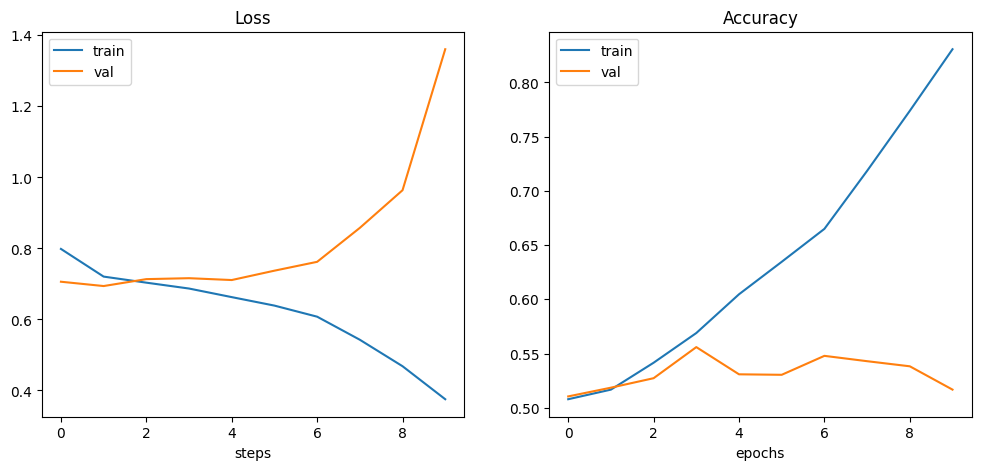

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.plot(train_loss, label='train')
ax1.plot(val_loss, label='val')
ax1.set_title('Loss')
ax1.set_xlabel('steps')
ax1.legend()

ax2.plot(train_acc, label='train')
ax2.plot(val_acc, label='val')
ax2.set_title('Accuracy')
ax2.set_xlabel('epochs')
ax2.legend()

plt.show()

In [ ]:
model.eval()
preds = []
targets = []
with torch.no_grad():
    for X, y in tqdm(val_dataloader):
        out = model(X.squeeze(1).to(device))
        predict = torch.argmax(out.cpu(), dim=1)
        preds.append(predict)
        targets.append(y)

preds = torch.cat(preds)
targets = torch.cat(targets)

100%|██████████| 70/70 [00:02<00:00, 26.14it/s]


In [ ]:
bcm = BinaryConfusionMatrix()
f1 = BinaryF1Score()
acc = BinaryAccuracy()

print(f'Confusion matrix: \n{bcm(preds, targets)}')
print()
print(f'F1-score: {f1(preds, targets)}')
print(f'Accuracy: {acc(preds, targets)}')

Confusion matrix: 
tensor([[ 779, 1479],
        [ 678, 1527]])

F1-score: 0.5860679149627686
Accuracy: 0.5166928172111511


* **Data loader, Train loop \& Model trainig** (8pts)

* **Evaluate model**

Provide confusion matrix, F1 score, and loss curve.(3pts)

Report on obtained results.(2pts)


### Efficient transformers (10 pts)

One of the key issues in a transformer is its quadratic complexity in relation to the length of the input sequence. This quadratic complexity can be computationally expensive, making it harder to scale transformers to longer sequences. Specifically, computing the attention matrix requires an $O(N^2)$ operation per layer, where $N$ is the length of the input sequence. This makes training and inference for large input sequences infeasible due to limitations in the available computational resources. 


Propose 2 implementation of eficient transformers, provide references and main idea of selected approaches. (2 pts)

Implement one of the approaches, compare inference with the previous model, make a conclusion. (8 pts)


In [ ]:
class Linformer(nn.Module):
    def __init__(self, dim, kdim=None, heads=8, dim_head=None, compress=False):
        super().__init__()
        self.dim = dim
        self.kdim = kdim if kdim is not None else dim
        self.heads = heads
        self.dim_head = dim_head if dim_head is not None else dim // heads
        self.compress = compress
        
        # Initialize linear projections
        self.query = nn.Linear(dim, self.kdim)
        self.key = nn.Linear(dim, self.kdim, bias=False)
        self.value = nn.Linear(dim, self.dim)
        
        # Initialize projection matrices
        self.proj_query = nn.Parameter(torch.randn(heads, self.kdim, self.dim_head))
        self.proj_key = nn.Parameter(torch.randn(heads, self.kdim, self.dim_head))
        
        # Initialize output projection
        self.proj_out = nn.Linear(heads * self.dim_head, self.dim)
        
    def forward(self, x):
        # Compute the query, key, and value matrices
        q = self.query(x)
        k = self.key(x)
        v = self.value(x)
        
        # Project the query and key matrices to a lower-dimensional subspace
        q_proj = torch.einsum('ijk,kl->ijl', q, self.proj_query)
        k_proj = torch.einsum('ijk,kl->ijl', k, self.proj_key)
        
        # Compute the attention weights for the projected matrices
        dot_prod = torch.einsum('bihd,bjhd->bijh', q_proj, k_proj) / self.dim_head ** 0.5
        weights = nn.functional.softmax(dot_prod, dim=-1)
        
        # Combine the attention weights and the value matrix to obtain the output
        att = torch.einsum('bijh,bjhd->bihd', weights, v)
        att = att.reshape(att.shape[0], -1, self.heads * self.dim_head)
        out = self.proj_out(att)
        
        return out

    
class Block(nn.Module):

    def __init__(
            self,
            dim,
            num_heads,
            mlp_ratio=4,  # ratio between hidden_dim and input_dim in MLP
            act_layer=nn.GELU,
            norm_layer=nn.LayerNorm
    ):
        super().__init__()
        self.norm1 = norm_layer(dim)
        self.attn = MultiHeadAttention(dim, num_heads=num_heads)
        self.norm2 = norm_layer(dim)
        self.mlp = nn.Sequential(nn.Linear(dim, dim * mlp_ratio), 
                                 act_layer(), 
                                 nn.Linear(dim * mlp_ratio, dim))

    def forward(self, x):
        x = x + self.attn(self.norm1(x))
        x = x + self.mlp(self.norm2(x))
        return x
    
class ViT(nn.Module):
    def __init__(
                    self,
                    seq_size=160,
                    patch_size=16,
                    in_chans=64,
                    num_classes=2,
                    embed_dim=768,
                    depth=12,
                    num_heads=12,
                    mlp_ratio=4,
                    norm_layer=nn.LayerNorm,
                    act_layer=nn.GELU
            ):
        # Your code is here
        super().__init__()
        self.patch_size = patch_size
        self.blocks = nn.Sequential(*[
            Block(embed_dim, num_heads, mlp_ratio, act_layer, norm_layer) for _ in range(depth)
        ])
        self.patch_proj = nn.Linear(in_chans * patch_size, embed_dim)
        self.embed_len = seq_size // patch_size
        self.pos_embed = nn.Parameter(torch.randn(1, self.embed_len, embed_dim) * .02)
        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))
        self.head = nn.Linear(embed_dim, num_classes)
    
    def forward(self, x):
        '''
        Args: 
            x: (batch_size, in_channels, img_size[0], img_size[1])
            
        Return:
            (batch_size, num_classes)
        '''
        x = sample2patches(x, patch_size=self.patch_size)
        x = self.patch_proj(x)
        x = x + self.pos_embed
        x = torch.cat((self.cls_token.expand(x.shape[0], -1, -1), x), dim=1)
        x = self.blocks(x)
        x = x[:, 0, :]  # take CLS token
        return self.head(x)

In [ ]:
model2 = ViT(seq_size=160,
            patch_size=16,
            in_chans=64,
            num_classes=2).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, 0.8)
lossfn = nn.CrossEntropyLoss()

In [ ]:
model2(X.squeeze(1).to(device)).size()

torch.Size([52, 2])

In [ ]:
X.size()

torch.Size([52, 1, 64, 160])